In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Data exploration
# X_train : 손글씨 사진
# Y_train : 라벨링, 손글씨에 대한 정답
# X_validation : 구조는 훈련 데이터와 동일하지만 모델 검증을 위한 데이터
# Y_validation : .. 라벨, 정답
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 28 * 28 pixel = 784
# DPI : dot per inch -> 오 몰랐다
# 처리하기 쉽도록 normalization 수행
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_validation = X_validation.reshape(X_validation.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_validation = np_utils.to_categorical(Y_validation, 10)

In [10]:
# Data modeling
# Deep learning model
# Sequential : 순차적인 모델
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Cross-entropy
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [11]:
# epochs, batch_size => hyper parameter, 사용자 지정 변수
# epochs : 전체의 데이터로 얼마나 learning을 수행할 것인가
# batch_size :
#  - minibatch method
hist = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation),
          epochs=30, batch_size=500)

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_validation, Y_validation)[1]))

Epoch 1/30
120/120 [==============================] - 4s 23ms/step - loss: 0.4034 - accuracy: 0.8903 - val_loss: 0.2128 - val_accuracy: 0.9386
Epoch 2/30
120/120 [==============================] - 3s 22ms/step - loss: 0.1759 - accuracy: 0.9507 - val_loss: 0.1466 - val_accuracy: 0.9579
Epoch 3/30
120/120 [==============================] - 3s 22ms/step - loss: 0.1249 - accuracy: 0.9650 - val_loss: 0.1214 - val_accuracy: 0.9643
Epoch 4/30
120/120 [==============================] - 3s 22ms/step - loss: 0.0965 - accuracy: 0.9731 - val_loss: 0.0985 - val_accuracy: 0.9713
Epoch 5/30
120/120 [==============================] - 3s 22ms/step - loss: 0.0750 - accuracy: 0.9789 - val_loss: 0.0928 - val_accuracy: 0.9712
Epoch 6/30
120/120 [==============================] - 3s 22ms/step - loss: 0.0635 - accuracy: 0.9823 - val_loss: 0.0815 - val_accuracy: 0.9755
Epoch 7/30
120/120 [==============================] - 3s 22ms/step - loss: 0.0513 - accuracy: 0.9859 - val_loss: 0.0750 - val_accuracy: 0.9775

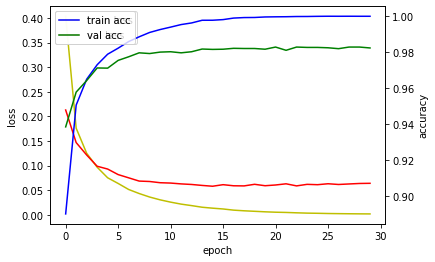

In [13]:
# Drawing chart lib
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()